In [1]:
import numpy as np 
import pandas as pd
import pytplot
import pytplot as tplot

In [2]:
path=r'D:\Space research\maven_data\maven\data\sci\mag\l2\2017\04\mvn_mag_l2_2017091ss_20170401_v01_r01.sts'
mag_vars= pytplot.sts_to_tplot(path)

In [3]:
mag_vars                                                                                       

['DDAY', 'OB_B', 'POSN', 'OB_BDPL']

In [4]:
#extracting the data from the variables and timestamp
mag=pytplot.data_quants['OB_B']
time=mag.time
time

<xarray.DataArray 'time' (time: 2764800)> Size: 22MB
array([Timestamp('2017-04-01 00:00:02.001000+0000', tz='UTC'),
       Timestamp('2017-04-01 00:00:02.032000+0000', tz='UTC'),
       Timestamp('2017-04-01 00:00:02.063000+0000', tz='UTC'), ...,
       Timestamp('2017-04-02 00:00:01.464000+0000', tz='UTC'),
       Timestamp('2017-04-02 00:00:01.495000+0000', tz='UTC'),
       Timestamp('2017-04-02 00:00:01.527000+0000', tz='UTC')], dtype=object)
Coordinates:
  * time     (time) object 22MB 2017-04-01T00:00:02.001000+00:00 ... 2017-04-...

In [5]:
print(time.shape)
Bvals=mag.values[:,0:3]
X= Bvals[:,0]
Y= Bvals[:,1]
Z= Bvals[:,2]
Btot= np.sqrt(np.square(X) + np.square(Y)+ np.square(Z))
print(Btot)

(2764800,)
[ 5.14805789  5.10101951  5.084024   ... 20.11477318 20.13105561
 20.04423608]


In [6]:
X

array([  4.09,   4.1 ,   4.17, ..., -18.62, -18.63, -18.53])

In [7]:
times = []

for ts in time.values:
    nanos = ts.value
    secs = nanos / 1e9
    # Convert seconds to pandas Timestamp with time zone
    pd_ts = pd.Timestamp.fromtimestamp(secs, tz='US/Eastern')
    
    # Append as numpy datetime64
    times.append(pd.Timestamp.to_datetime64(pd_ts))

# Convert times to a numpy array
times = np.array(times)
times
# #Convert the DataArray to a pandas Series to handle large arrays efficiently
# time_series = pd.Series(time.values, dtype='int64')

# # Convert the nanoseconds to pandas Timestamps
# timestamps = pd.to_datetime(time_series, unit='ns')

# # If you need to localize the timezone (e.g., UTC)
# times = timestamps.dt.tz_localize('UTC')

# # Display the converted timestamps
# print(times)

array(['2017-04-01T00:00:02.001000', '2017-04-01T00:00:02.032000',
       '2017-04-01T00:00:02.063000', ..., '2017-04-02T00:00:01.464000',
       '2017-04-02T00:00:01.495000', '2017-04-02T00:00:01.527000'],
      dtype='datetime64[us]')

In [8]:
#Convert to pandas Series
times_series = pd.Series(pd.to_datetime(times))

# Define the date for masking (2018-01-04)
mask_date = pd.Timestamp('2017-04-03').date()

# Create the date masks
date_mask = times_series.dt.date == mask_date

# Apply the masks to the timestamp arrays
masked_times = times_series[date_mask]

# Apply the masks to data arrays
masked_Btot = Btot[date_mask]
masked_Bx = X[date_mask]
masked_By = Y[date_mask]
masked_Bz = Z[date_mask]

In [9]:
# Example format: {'start_time': 'end_time': 'label'}
manual_labels = {
 '2017-04-01 00:00:00': ('2017-04-01 00:35:00', 'IMB'),
    '2017-04-01 00:35:00': ('2017-04-01 01:05:00', 'Induced magnetosphere'),
    '2017-04-01 01:05:00': ('2017-04-01 01:30:00', 'IMB'),
    '2017-04-01 01:30:00': ('2017-04-01 02:15:00', 'magnetosheath'),
    '2017-04-01 02:15:00': ('2017-04-01 02:25:00', 'bow shock'),
    '2017-04-01 02:25:00': ('2017-04-01 03:10:00', 'solar wind'),
'2017-04-01 03:10:00': ('2017-04-01 03:20:00', 'bow shock'),
    '2017-04-01 03:20:00': ('2017-04-01 04:20:00', 'magnetosheath'),
    '2017-04-01 04:20:00': ('2017-04-01 05:15:00', 'IMB'),
    '2017-04-01 05:15:00': ('2017-04-01 05:50:00', 'Induced magnetosphere'),
    '2017-04-01 05:50:00': ('2017-04-01 06:20:00', 'IMB'),
'2017-04-01 06:20:00': ('2017-04-01 07:05:00', 'magnetosheath'),
'2017-04-01 07:05:00': ('2017-04-01 07:15:00', 'bow shock'),
'2017-04-01 07:15:00': ('2017-04-01 08:30:00', 'solar wind'),
'2017-04-01 08:30:00': ('2017-04-01 08:50:00', 'bow shock'),
    '2017-04-01 08:50:00': ('2017-04-01 09:15:00', 'magnetosheath'),
    '2017-04-01 09:15:00': ('2017-04-01 09:55:00', 'IMB'),
    '2017-04-01 09:55:00': ('2017-04-01 10:25:00', 'Induced magnetosphere'),
    '2017-04-01 10:25:00': ('2017-04-01 10:50:00', 'IMB'),
'2017-04-01 10:50:00': ('2017-04-01 14:00:00', 'magnetosheath'),
'2017-04-01 14:00:00': ('2017-04-01 14:20:00', 'IMB'),
    '2017-04-01 14:20:00': ('2017-04-01 14:50:00', 'Induced magnetosphere'),
'2017-04-01 14:50:00': ('2017-04-01 15:10:00', 'IMB'),
'2017-04-01 15:20:00': ('2017-04-01 18:30:00', 'magnetosheath'),
'2017-04-01 18:30:00': ('2017-04-01 19:00:00', 'IMB'),
    '2017-04-01 19:00:00': ('2017-04-01 19:15:00', 'Induced magnetosphere'),
'2017-04-01 19:15:00': ('2017-04-01 19:35:00', 'IMB'),
'2017-04-01 19:35:00': ('2017-04-01 23:10:00', 'magnetosheath'),
'2017-04-01 23:10:00': ('2017-04-01 23:30:00', 'IMB'),
    '2017-04-01 23:30:00': ('2017-04-01 23:59:59', 'Induced magnetosphere'),




}

# Convert string times to datetime64
manual_labels = {pd.to_datetime(start): (pd.to_datetime(end), label) for start, (end, label) in manual_labels.items()}

In [10]:
df = pd.DataFrame({'time': time, 'B': Btot})
df

time          B
0       2017-04-01 00:00:02.001000+00:00   5.148058
1       2017-04-01 00:00:02.032000+00:00   5.101020
2       2017-04-01 00:00:02.063000+00:00   5.084024
3       2017-04-01 00:00:02.095000+00:00   4.896856
4       2017-04-01 00:00:02.126000+00:00   4.832567
...                                  ...        ...
2764795 2017-04-02 00:00:01.402000+00:00  20.085564
2764796 2017-04-02 00:00:01.433000+00:00  20.008950
2764797 2017-04-02 00:00:01.464000+00:00  20.114773
2764798 2017-04-02 00:00:01.495000+00:00  20.131056
2764799 2017-04-02 00:00:01.527000+00:00  20.044236

[2764800 rows x 2 columns]

In [11]:
# Ensure the time column is in datetime format and in UTC
df['time'] = pd.to_datetime(df['time'], utc=True)
# Convert string times to datetime64 with UTC
manual_labels = {pd.to_datetime(start, utc=True): (pd.to_datetime(end, utc=True), label) for start, (end, label) in manual_labels.items()}


In [12]:

# Initialize the label column
df['label'] = None

# Apply the labels
for start, (end, label) in manual_labels.items():
    mask = (df['time'] >= start) & (df['time'] < end)
    df.loc[mask, 'label'] = label
# Save the labeled data to a CSV file
# df.to_csv('labeled_data04_03.csv', index=False)
df

time          B label
0       2017-04-01 00:00:02.001000+00:00   5.148058   IMB
1       2017-04-01 00:00:02.032000+00:00   5.101020   IMB
2       2017-04-01 00:00:02.063000+00:00   5.084024   IMB
3       2017-04-01 00:00:02.095000+00:00   4.896856   IMB
4       2017-04-01 00:00:02.126000+00:00   4.832567   IMB
...                                  ...        ...   ...
2764795 2017-04-02 00:00:01.402000+00:00  20.085564  None
2764796 2017-04-02 00:00:01.433000+00:00  20.008950  None
2764797 2017-04-02 00:00:01.464000+00:00  20.114773  None
2764798 2017-04-02 00:00:01.495000+00:00  20.131056  None
2764799 2017-04-02 00:00:01.527000+00:00  20.044236  None

[2764800 rows x 3 columns]

In [13]:
# Importing modules for neural network
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation, Bidirectional, Masking

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

import keras.backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

15-Sep-24 21:25:50: <frozen importlib._bootstrap>:488: DeprecationWarning: Type google._upb._message.MessageMapContainer uses PyType_Spec with a metaclass that has custom tp_new. This is deprecated and will no longer be allowed in Python 3.14.

15-Sep-24 21:25:50: <frozen importlib._bootstrap>:488: DeprecationWarning: Type google._upb._message.ScalarMapContainer uses PyType_Spec with a metaclass that has custom tp_new. This is deprecated and will no longer be allowed in Python 3.14.



In [14]:
# since the model doesnot perform well when supplying only the magnetic field data, we want to give comppnents of ma
X = X.reshape(-1, 1)  # Reshape X to (2764800, 1)
Y = Y.reshape(-1, 1)  # Reshape Y to (2764800, 1)
Z = Z.reshape(-1, 1) 
data=np.concatenate((df,X,Y,Z), axis=1)
data

array([[Timestamp('2017-04-01 00:00:02.001000+0000', tz='UTC'),
        5.148057886232438, 'IMB', 4.09, 3.12, -0.2],
       [Timestamp('2017-04-01 00:00:02.032000+0000', tz='UTC'),
        5.101019505941925, 'IMB', 4.1, 3.02, -0.3],
       [Timestamp('2017-04-01 00:00:02.063000+0000', tz='UTC'),
        5.084023996796239, 'IMB', 4.17, 2.9, -0.22],
       ...,
       [Timestamp('2017-04-02 00:00:01.464000+0000', tz='UTC'),
        20.114773177940634, None, -18.62, 0.54, -7.59],
       [Timestamp('2017-04-02 00:00:01.495000+0000', tz='UTC'),
        20.131055610672778, None, -18.63, 0.52, -7.61],
       [Timestamp('2017-04-02 00:00:01.527000+0000', tz='UTC'),
        20.044236079232356, None, -18.53, 0.44, -7.63]], dtype=object)

In [15]:
# Specify the column names based on your original data
columns = ['time','B','label',  'Bx', 'By', 'Bz']

# Convert to DataFrame
df_final = pd.DataFrame(data, columns=columns)
df_final

time          B label     Bx    By    Bz
0       2017-04-01 00:00:02.001000+00:00   5.148058   IMB   4.09  3.12  -0.2
1       2017-04-01 00:00:02.032000+00:00    5.10102   IMB    4.1  3.02  -0.3
2       2017-04-01 00:00:02.063000+00:00   5.084024   IMB   4.17   2.9 -0.22
3       2017-04-01 00:00:02.095000+00:00   4.896856   IMB   4.04  2.76  -0.2
4       2017-04-01 00:00:02.126000+00:00   4.832567   IMB   4.04  2.64 -0.25
...                                  ...        ...   ...    ...   ...   ...
2764795 2017-04-02 00:00:01.402000+00:00  20.085564  None -18.61  0.63 -7.53
2764796 2017-04-02 00:00:01.433000+00:00   20.00895  None  -18.5  0.59  -7.6
2764797 2017-04-02 00:00:01.464000+00:00  20.114773  None -18.62  0.54 -7.59
2764798 2017-04-02 00:00:01.495000+00:00  20.131056  None -18.63  0.52 -7.61
2764799 2017-04-02 00:00:01.527000+00:00  20.044236  None -18.53  0.44 -7.63

[2764800 rows x 6 columns]

In [16]:
df_f=df_final.dropna()
df_f=df_f[['time','B','Bx','By','Bz','label']]
df_f

time          B     Bx    By    Bz  \
0       2017-04-01 00:00:02.001000+00:00   5.148058   4.09  3.12  -0.2   
1       2017-04-01 00:00:02.032000+00:00    5.10102    4.1  3.02  -0.3   
2       2017-04-01 00:00:02.063000+00:00   5.084024   4.17   2.9 -0.22   
3       2017-04-01 00:00:02.095000+00:00   4.896856   4.04  2.76  -0.2   
4       2017-04-01 00:00:02.126000+00:00   4.832567   4.04  2.64 -0.25   
...                                  ...        ...    ...   ...   ...   
2764714 2017-04-01 23:59:58.870000+00:00  18.103428 -16.98  0.69 -6.24   
2764715 2017-04-01 23:59:58.902000+00:00  18.124028 -17.02   0.6  -6.2   
2764716 2017-04-01 23:59:58.933000+00:00  18.067659 -16.95  0.57 -6.23   
2764717 2017-04-01 23:59:58.964000+00:00  18.223811  -17.1  0.62 -6.27   
2764718 2017-04-01 23:59:58.995000+00:00  18.212617 -17.07  0.61 -6.32   

                         label  
0                          IMB  
1                          IMB  
2                          IMB  
3                          IMB  
4                          IMB  
...                        ...  
2764714  Induced magnetosphere  
2764715  Induced magnetosphere  
2764716  Induced magnetosphere  
2764717  Induced magnetosphere  
2764718  Induced magnetosphere  

[2745519 rows x 6 columns]

In [17]:
time_plot=df_f.iloc[:,0]
B_plot=df_f.iloc[:,1]
B_plots=B_plot.values
# B_plots=B_plots.reshape(-1,1)
Bx_plot=df_f.iloc[:,2]
Bx_plots=Bx_plot.values
# Bx_plots=Bx_plots.reshape(-1,1)
By_plot=df_f.iloc[:,3]
By_plots=By_plot.values
# By_plots=By_plots.reshape(-1,1)
Bz_plot=df_f.iloc[:,4]
Bz_plots=Bz_plot.values
# Bz_plots=Bz_plots.reshape(-1,1)
label_plot=df_f.iloc[:,5]
times_plot = pd.Series(pd.to_datetime(time_plot))
times_plot

0         2017-04-03 00:00:01.125000+00:00
1         2017-04-03 00:00:01.156000+00:00
2         2017-04-03 00:00:01.188000+00:00
3         2017-04-03 00:00:01.219000+00:00
4         2017-04-03 00:00:01.250000+00:00
                        ...               
2764740   2017-04-03 23:59:58.850000+00:00
2764741   2017-04-03 23:59:58.881000+00:00
2764742   2017-04-03 23:59:58.912000+00:00
2764743   2017-04-03 23:59:58.943000+00:00
2764744   2017-04-03 23:59:58.975000+00:00
Name: time, Length: 2764745, dtype: datetime64[ns, UTC]

In [18]:
print(Bx_plots.shape)
print('*********')
print(By_plots.shape)

(2764745,)
*********
(2764745,)


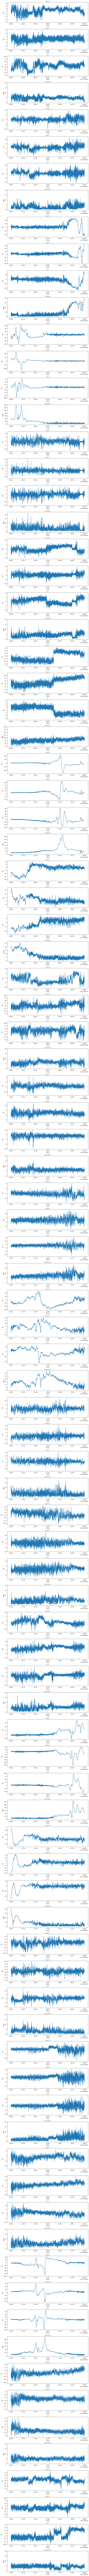

In [93]:
def segment_data(times, data, freq='1H'):
    df = pd.DataFrame({'times': times})
    df.set_index('times', inplace=True)
    if data.ndim == 1:
        df['data'] = data
    else:
        # Handle the case where data is a 2D array
        for i in range(data.shape[0]):
            df[f'data_{i}'] = data[i, :]
    grouped = df.resample(freq)
    return [group for _, group in grouped]
# Segment the timeseries data into one-hour intervals
segments1B = segment_data(times_plot, Bx_plots, '1H')
segments2B = segment_data(times_plot, By_plots, '1H')
segments3B = segment_data(times_plot, Bz_plots, '1H')
segments_Btot = segment_data(times_plot, B_plots, '1H')

# Calculate the total number of segments (maximum of all segment lengths times 3 for each data type)
num_segments = max(len(segments1B), len(segments2B),len(segments3B), len(segments_Btot)) * 4

# Create subplots
fig, axes = plt.subplots(num_segments, 1, figsize=(10, 3 * num_segments))

# Ensure axes is iterable
if num_segments == 1:
    axes = [axes]

# Plot each segment
for i in range(num_segments):
    segment_index = i // 4  # Determine the segment index for each type of plot

    # Determine which times and data to use
    if i % 4 == 0:
       # Plot for Bx
        if segment_index >= len(segments1B):
            continue
        segment = segments1B[segment_index]
        times_segment = segment.index.to_numpy()
        Bx_segment = segment['data'].to_numpy()

        # If Btot_segment is empty, skip the plotting
        if Bx_segment.size == 0:
            continue

        axes[i].plot(times_segment, Bx_segment)
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Bx')
        current_ylim = axes[i].get_ylim()
        min_upper_limit = 20

        # # Ensure the upper limit is at least min_upper_limit
        # new_upper_limit = max(current_ylim[1], min_upper_limit)

        # # Apply the new limits
        # axes[i].set_ylim(current_ylim[0], new_upper_limit)

        axes[i].set_title(f'Bx plot {segment_index + 1}', fontsize=7)

    elif i % 4 == 1:
        # Plot for Bx
        if segment_index >= len(segments2B):
            continue
        segment = segments2B[segment_index]
        times_segment = segment.index.to_numpy()
        By_segment = segment['data'].to_numpy()

        # If Btot_segment is empty, skip the plotting
        if By_segment.size == 0:
            continue

        axes[i].plot(times_segment, By_segment)
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('By')
        current_ylim = axes[i].get_ylim()
        # min_upper_limit = 20

        # # Ensure the upper limit is at least min_upper_limit
        # new_upper_limit = max(current_ylim[1], min_upper_limit)

        # # Apply the new limits
        # axes[i].set_ylim(current_ylim[0], new_upper_limit)

        axes[i].set_title(f'By plot {segment_index + 1}', fontsize=7)
    elif i % 4 == 2:
        # Plot for Bx
        if segment_index >= len(segments3B):
            continue
        segment = segments3B[segment_index]
        times_segment = segment.index.to_numpy()
        Bz_segment = segment['data'].to_numpy()

        # If Btot_segment is empty, skip the plotting
        if Bz_segment.size == 0:
            continue

        axes[i].plot(times_segment, Bz_segment)
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Bz')
        current_ylim = axes[i].get_ylim()
        # min_upper_limit = 20

        # # Ensure the upper limit is at least min_upper_limit
        # new_upper_limit = max(current_ylim[1], min_upper_limit)

        # # Apply the new limits
        # axes[i].set_ylim(current_ylim[0], new_upper_limit)

        axes[i].set_title(f'Bz {segment_index + 1}', fontsize=7)

    else:
        # Plot for Btot
        if segment_index >= len(segments_Btot):
            continue
        segment = segments_Btot[segment_index]
        times_segment = segment.index.to_numpy()
        Btot_segment = segment['data'].to_numpy()

        # If Btot_segment is empty, skip the plotting
        if Btot_segment.size == 0:
            continue

        axes[i].plot(times_segment, Btot_segment)
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Btot')
        current_ylim = axes[i].get_ylim()
        min_upper_limit = 20

        # Ensure the upper limit is at least min_upper_limit
        new_upper_limit = max(current_ylim[1], min_upper_limit)

        # Apply the new limits
        axes[i].set_ylim(current_ylim[0], new_upper_limit)

        axes[i].set_title(f'B total plot {segment_index + 1}',fontsize=7)

# Adjust layout to prevent overlap
plt.tight_layout()
# plt.savefig('04_03_magnetic')

# Display the plot
plt.show()

In [17]:
# Convert datetime to timestamp
df_f['time'] = df_f['time'].apply(lambda x: x.timestamp())
df_f['label'] = df_f['label'].apply(lambda x: 1 if x == 'IMB' else 0)
df_f

time          B     Bx    By    Bz  label
0        1.491005e+09   5.148058   4.09  3.12  -0.2      1
1        1.491005e+09    5.10102    4.1  3.02  -0.3      1
2        1.491005e+09   5.084024   4.17   2.9 -0.22      1
3        1.491005e+09   4.896856   4.04  2.76  -0.2      1
4        1.491005e+09   4.832567   4.04  2.64 -0.25      1
...               ...        ...    ...   ...   ...    ...
2764714  1.491091e+09  18.103428 -16.98  0.69 -6.24      0
2764715  1.491091e+09  18.124028 -17.02   0.6  -6.2      0
2764716  1.491091e+09  18.067659 -16.95  0.57 -6.23      0
2764717  1.491091e+09  18.223811  -17.1  0.62 -6.27      0
2764718  1.491091e+09  18.212617 -17.07  0.61 -6.32      0

[2745519 rows x 6 columns]

In [18]:
X_fd=df_f.drop(['label'], axis=1)
print(type(X_fd))
print(X_fd.shape)

<class 'pandas.core.frame.DataFrame'>
(2745519, 5)


In [19]:
# X_ff = X_fd[['time','B', 'Bx', 'By']].to_numpy()
# X_ff = np.array(X_ff, dtype=np.float32)
# X_ff

In [20]:
#here the code isnot used becuase it was later normalized
# X_final = X_ff.reshape(-1, 1, 4)
# X_final.shape

In [21]:
Y_f=df_f['label']
Y_f = Y_f.to_numpy()
Y_f=Y_f.astype('int')
Y_f

array([1, 1, 1, ..., 0, 0, 0])

In [22]:
count=np.sum(Y_f==1)
count

614340

In [23]:
#got higher accuracy while training wothout time stamp
X_values = X_fd.iloc[:, 1:].values  # Exclude the timestamp
X_reshaped = X_values.reshape((X_values.shape[0], 1, X_values.shape[1])) 
X_reshaped = X_reshaped.astype('float32')

In [24]:
print(type(X_reshaped))
print(X_reshaped.dtype)

<class 'numpy.ndarray'>
float32


In [25]:
# Importing modules for neural network
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation, Bidirectional, Masking

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

import keras.backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

In [26]:
#basic way
# Create a training set, validation set, and testing set using 
x_train, x_testval, y_train, y_testval = train_test_split(X_reshaped, Y_f, test_size=0.5, shuffle=False)
x_val, x_test, y_val, y_test = train_test_split(x_testval, y_testval, test_size=0.5, shuffle=False)

In [35]:
from tensorflow.keras.losses import binary_crossentropy
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Masking, Bidirectional, LSTM, LayerNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Load the model later
model23 = load_model('component_basic.keras', custom_objects={'binary_crossentropy': binary_crossentropy})

# Continue training the model on new data
model23.fit(x_train,y_train, epochs=10, batch_size=300)

# Test the model on new data
new_predict_y23 = model23.predict(x_test)

# Convert the continuous predictions to binary class labels
new_binary_predictions23 = (new_predict_y23 > 0.5).astype(int)

print(new_binary_predictions23)

Epoch 1/10
4576/4576 ━━━━━━━━━━━━━━━━━━━━ 84s 18ms/step - accuracy: 0.8942 - loss: 0.2507
Epoch 2/10
4576/4576 ━━━━━━━━━━━━━━━━━━━━ 141s 18ms/step - accuracy: 0.9050 - loss: 0.2238
Epoch 3/10
2659/4576 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9064 - loss: 0.2201

KeyboardInterrupt: 

In [29]:
# basic model which is uesd to train the component data.
model = Sequential()
model.add(LSTM(256, input_shape=(1, X_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=300)

12-Sep-24 14:46:27: C:\Users\posha\anaconda3\envs\mywork\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1/10
4608/4608 ━━━━━━━━━━━━━━━━━━━━ 113s 24ms/step - accuracy: 0.9321 - loss: 0.2087 - val_accuracy: 0.8385 - val_loss: 0.5339
Epoch 2/10
4608/4608 ━━━━━━━━━━━━━━━━━━━━ 102s 22ms/step - accuracy: 0.9468 - loss: 0.1609 - val_accuracy: 0.8272 - val_loss: 0.5678
Epoch 3/10
4608/4608 ━━━━━━━━━━━━━━━━━━━━ 99s 21ms/step - accuracy: 0.9483 - loss: 0.1565 - val_accuracy: 0.8210 - val_loss: 0.5644
Epoch 4/10
4608/4608 ━━━━━━━━━━━━━━━━━━━━ 102s 22ms/step - accuracy: 0.9495 - loss: 0.1524 - val_accuracy: 0.8135 - val_loss: 0.5915
Epoch 5/10
4608/4608 ━━━━━━━━━━━━━━━━━━━━ 102s 22ms/step - accuracy: 0.9503 - loss: 0.1504 - val_accuracy: 0.8012 - val_loss: 0.6444
Epoch 6/10
4608/4608 ━━━━━━━━━━━━━━━━━━━━ 99s 21ms/step - accuracy: 0.9506 - loss: 0.1490 - val_accuracy: 0.8113 - val_loss: 0.5917
Epoch 7/10
4608/4608 ━━━━━━━━━━━━━━━━━━━━ 103s 22ms/step - accuracy: 0.9509 - loss: 0.1477 - val_accuracy: 0.8152 - val_loss: 0.5804
Epoch 8/10
4608/4608 ━━━━━━━━━━━━━━━━━━━━ 105s 23ms/step - accuracy: 0.

In [55]:
#total prediction for the plot
predict_xtot =model.predict(X_reshaped)
# Convert the continuous predictions to binary class labels
total_binary_predictions = (predict_xtot > 0.5).astype(int)
total_binary_predictions

86399/86399 ━━━━━━━━━━━━━━━━━━━━ 507s 6ms/step


array([[[0]],

       [[0]],

       [[0]],

       ...,

       [[0]],

       [[0]],

       [[0]]])

<Axes: >

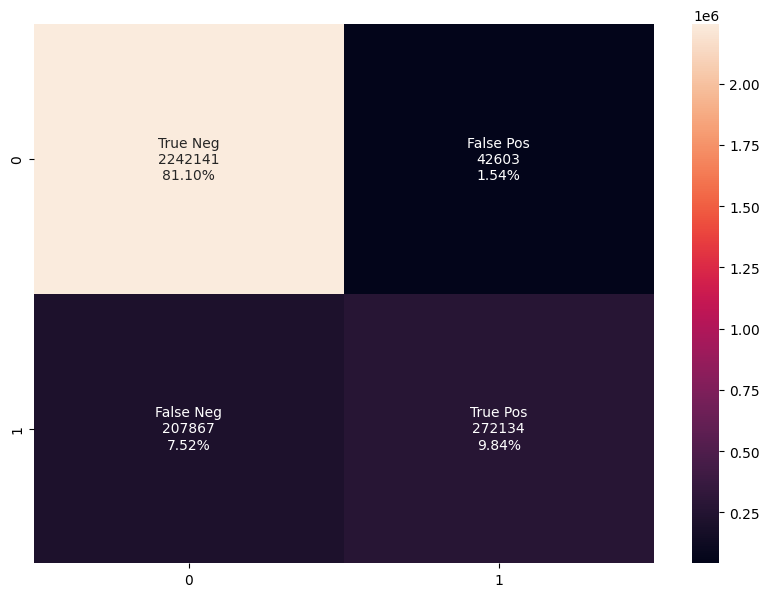

In [46]:
import matplotlib.pyplot as plt
import seaborn as sn
result = confusion_matrix(Y_f, total_binary_predictions)
plt.figure(figsize = (10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in result.flatten()/np.sum(result)]
cnf_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
cnf_labels = np.asarray(cnf_labels).reshape(2,2)
sn.heatmap(result, annot=cnf_labels, fmt='')

In [42]:
#improvised version of the above model
import numpy as np
from tensorflow.keras.layers import Layer, Input, Masking, LSTM, Bidirectional, Dropout, Dense, LayerNormalization, Add, Attention
from tensorflow.keras.layers import Flatten

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Model definition
inputs = Input((1, X_reshaped.shape[2]))
masked = Masking(mask_value=0.0)(inputs)

# Increase the number of units in LSTM layers
lstm_out_1 = Bidirectional(LSTM(256, return_sequences=True))(masked)
norm_1 = LayerNormalization()(lstm_out_1)

# Add an additional LSTM layer
lstm_out_2 = Bidirectional(LSTM(256, return_sequences=True))(norm_1)
norm_2 = LayerNormalization()(lstm_out_2)
flatten_out = Flatten()(norm_2)

# # Third LSTM layer
# lstm_out_3 = Bidirectional(LSTM(128, return_sequences=False))(norm_2)
# norm_3 = LayerNormalization()(lstm_out_3)

# Dense Layers with Dropout (lower dropout rate)
dense_out_1 = Dense(128, activation='relu')(flatten_out)
dropout_out_1 = Dropout(0.1)(dense_out_1)

# dense_out_2 = Dense(64, activation='relu')(dropout_out_1)
# dropout_out_2 = Dropout(0.1)(dense_out_2)

# Output Layer
output = Dense(1, activation='sigmoid')(dropout_out_1)

12-Sep-24 19:04:57: C:\Users\posha\anaconda3\envs\mywork\Lib\site-packages\keras\src\layers\layer.py:915: UserWarning: Layer 'flatten_10' (of type Flatten) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



In [43]:
from tensorflow.keras.losses import BinaryCrossentropy
# Instantiate the binary crossentropy loss
binary_crossentropy = BinaryCrossentropy()
# Define the model
model = Model(inputs=inputs, outputs=output)

# Compile the model with adjusted focal loss and learning rate
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [44]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# # Reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model with the reduce learning rate callback
model.fit(x_train, y_train, epochs=10, batch_size=32, callbacks=[reduce_lr], validation_data=(x_val, y_val))

Epoch 1/10
43200/43200 ━━━━━━━━━━━━━━━━━━━━ 940s 22ms/step - accuracy: 0.9117 - loss: 0.2669 - val_accuracy: 0.7823 - val_loss: 0.6785 - learning_rate: 1.0000e-04
Epoch 2/10
43200/43200 ━━━━━━━━━━━━━━━━━━━━ 934s 22ms/step - accuracy: 0.9244 - loss: 0.2366 - val_accuracy: 0.7927 - val_loss: 0.7666 - learning_rate: 1.0000e-04
Epoch 3/10
13211/43200 ━━━━━━━━━━━━━━━━━━━━ 11:27 23ms/step - accuracy: 0.9238 - loss: 0.2344

KeyboardInterrupt: 

In [64]:
#total prediction for the plot
predict_xtot =model.predict(X_reshaped)
# Convert the continuous predictions to binary class labels
total_binary_predictions = (predict_xtot > 0.5).astype(int)
total_binary_predictions

86399/86399 ━━━━━━━━━━━━━━━━━━━━ 558s 6ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [65]:
# # Flatten the total_binary_predictions array
# total_binary_predictions = np.squeeze(total_binary_predictions)
# total_binary_predictions.shape

In [66]:
# total_binary_predictions=total_binary_predictions.reshape(-1,1)
# total_binary_predictions

<Axes: >

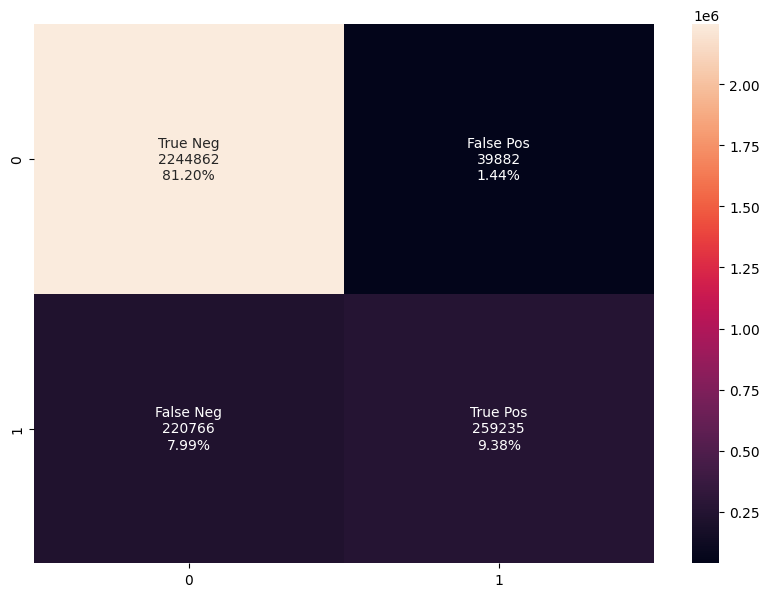

In [67]:
import matplotlib.pyplot as plt
import seaborn as sn
result = confusion_matrix(Y_f, total_binary_predictions)
plt.figure(figsize = (10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in result.flatten()/np.sum(result)]
cnf_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
cnf_labels = np.asarray(cnf_labels).reshape(2,2)
sn.heatmap(result, annot=cnf_labels, fmt='')

In [72]:
data_f=df_f.drop(['Bx', 'By', 'Bz', 'label'], axis=1)
r_data=np.concatenate((data_f,total_binary_predictions), axis=1)
r_data

array([[Timestamp('2017-04-03 00:00:01.125000+0000', tz='UTC'),
        5.430736598289407, 0],
       [Timestamp('2017-04-03 00:00:01.156000+0000', tz='UTC'),
        5.4681989722393975, 0],
       [Timestamp('2017-04-03 00:00:01.188000+0000', tz='UTC'),
        5.453558471310269, 0],
       ...,
       [Timestamp('2017-04-03 23:59:58.912000+0000', tz='UTC'),
        5.809483625934408, 0],
       [Timestamp('2017-04-03 23:59:58.943000+0000', tz='UTC'),
        5.744292819834309, 0],
       [Timestamp('2017-04-03 23:59:58.975000+0000', tz='UTC'),
        5.839126647025221, 0]], dtype=object)

In [73]:
updated_time=r_data[:,0]
updated_B=r_data[:,1]
updated_label=r_data[:,2]

04-Sep-24 17:28:27: C:\Users\posha\AppData\Local\Temp\ipykernel_26552\3904848275.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped = df.resample(freq)



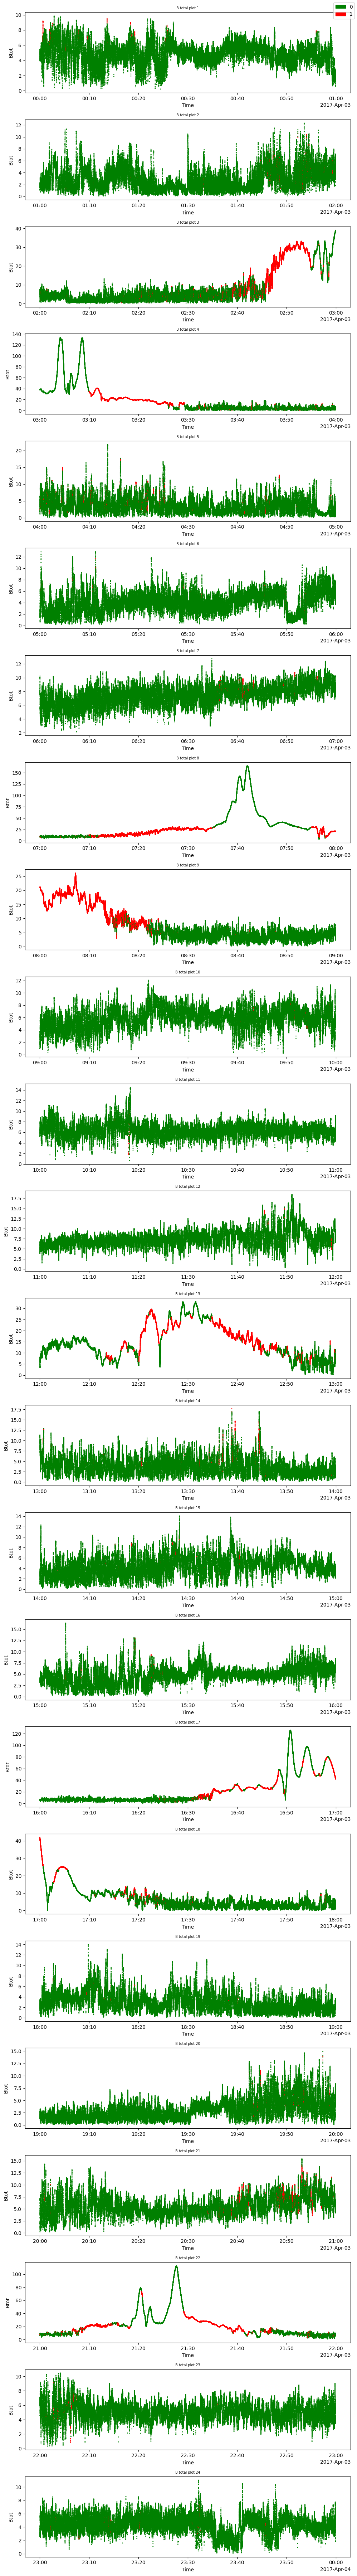

In [74]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

# Function to segment data based on one-hour intervals
def segment_data(times, data, freq='1H'):
    df = pd.DataFrame({'times': times})
    df.set_index('times', inplace=True)
    if data.ndim == 1:
        df['data'] = data
    else:
        # Handle the case where data is a 2D array
        for i in range(data.shape[0]):
            df[f'data_{i}'] = data[i, :]
    grouped = df.resample(freq)
    return [group for _, group in grouped]

# Segment the timeseries data into one-hour intervals
segments_Btot = segment_data(updated_time, updated_B, '1H')

# Calculate the total number of segments (maximum of all segment lengths times 3 for each data type)
num_segments = len(segments_Btot)

# Create subplots
fig, axes = plt.subplots(num_segments, 1, figsize=(10, 3 * num_segments))

# Ensure axes is iterable
if num_segments == 1:
    axes = [axes]

# Define colors for the different labels
label_colors = {
    0: 'green',
    1: 'red',
}

legend_patches = [mpatches.Patch(color=color, label=label) for label, color in label_colors.items()]

# Plot each segment
for i in range(num_segments):
    # Plot for Btot
    segment = segments_Btot[i]
    times_segment = segment.index.to_numpy()
    Btot_segment = segment['data'].to_numpy()
    
    # Calculate the labels for this segment
    labels_segment = updated_label[i * len(times_segment):(i + 1) * len(times_segment)]  # Adjust based on the segment

    # If Btot_segment is empty, skip the plotting
    if Btot_segment.size == 0:
        continue

    # Assign colors based on labels
    colors = ['red' if label == 1 else 'green' for label in labels_segment]

    # Plot the data points with corresponding colors
    axes[i].scatter(times_segment, Btot_segment, color=colors, s=1)
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Btot')
    axes[i].set_title(f'B total plot {i + 1}', fontsize=7)

# Add a legend to the plot
fig.legend(handles=legend_patches, loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()
# plt.savefig('0403_best_output_plot')

# Display the plot
plt.show()

In [73]:
print(type(Y_f), Y_f.dtype)
print(type(total_binary_predictions), total_binary_predictions.dtype)

<class 'numpy.ndarray'> int32
<class 'numpy.ndarray'> int32


In [75]:
from tensorflow.keras.models import Sequential, load_model
# Save the model
model.save('multiple_finefirst.keras')

In [76]:
path2=r'D:\Space research\maven_data\maven\data\sci\mag\l2\2017\03\mvn_mag_l2_2017087ss_20170328_v01_r01.sts'
mag_vars23= pytplot.sts_to_tplot(path2)

In [77]:
mag_vars23

['DDAY', 'OB_B', 'POSN', 'OB_BDPL']

In [78]:
#extracting the data from the variables and timestamp
mag23=pytplot.data_quants['OB_B']
time23=mag23.time
time23

<xarray.DataArray 'time' (time: 5529664)> Size: 44MB
array([1490659201671000000, 1490659201702000000, 1490659201733000000, ...,
       1491264002631000000, 1491264002662000000, 1491264002693000000],
      dtype=object)
Coordinates:
  * time     (time) object 44MB 1490659201671000000 ... 1491264002693000000

In [79]:
Bvals23=mag23.values[:,0:3]
X23= Bvals23[:,0]
Y23= Bvals23[:,1]
Z23= Bvals23[:,2]
Btot23= np.sqrt(np.square(X23) + np.square(Y23)+ np.square(Z23))
print(Btot23)

[4.93025354 4.95066662 4.99012024 ... 3.46076581 3.55609336 3.49200515]


In [80]:
#Convert the DataArray to a pandas Series to handle large arrays efficiently
time_series23 = pd.Series(time23.values, dtype='int64')

# Convert the nanoseconds to pandas Timestamps
timestamps23 = pd.to_datetime(time_series23, unit='ns')

# If you need to localize the timezone (e.g., UTC)
times23 = timestamps23.dt.tz_localize('UTC')

# Display the converted timestamps
print(times23)

0         2017-03-28 00:00:01.671000+00:00
1         2017-03-28 00:00:01.702000+00:00
2         2017-03-28 00:00:01.733000+00:00
3         2017-03-28 00:00:01.765000+00:00
4         2017-03-28 00:00:01.796000+00:00
                        ...               
5529659   2017-04-04 00:00:02.568000+00:00
5529660   2017-04-04 00:00:02.600000+00:00
5529661   2017-04-04 00:00:02.631000+00:00
5529662   2017-04-04 00:00:02.662000+00:00
5529663   2017-04-04 00:00:02.693000+00:00
Length: 5529664, dtype: datetime64[ns, UTC]


In [81]:
# Example format: {'start_time': 'end_time': 'label'}
manual_labels = {
 '2017-03-28 00:00:00': ('2017-03-28 00:10:00', 'magnetosheath'),
    '2017-03-28 00:10:00': ('2017-03-28 00:32:00', 'IMB'),
    '2017-03-28 00:32:00': ('2017-03-28 01:05:00', 'Induced magnetosphere'),
    '2017-03-28 01:05:00': ('2017-03-28 01:30:00', 'IMB'),
    '2017-03-28 01:30:00': ('2017-03-28 02:20:00', 'magnetosheath'),
    '2017-03-28 02:20:00': ('2017-03-28 02:30:00', 'bow shock'),
    '2017-03-28 02:30:00': ('2017-03-28 03:40:00', 'solar wind'),
'2017-03-28 03:40:00': ('2017-03-28 03:50:00', 'bow shock'),
    '2017-03-28 03:50:00': ('2017-03-28 04:35:00', 'magnetosheath'),
    '2017-03-28 04:35:00': ('2017-03-28 05:15:00', 'IMB'),
    '2017-03-28 05:15:00': ('2017-03-28 05:50:00', 'Induced magnetosphere'),
    '2017-03-28 05:50:00': ('2017-03-28 06:30:00', 'IMB'),
'2017-03-28 06:30:00': ('2017-03-28 06:50:00', 'magnetosheath'),
'2017-03-28 06:50:00': ('2017-03-28 06:55:00', 'bow shock'),
'2017-03-28 06:55:00': ('2017-03-28 07:55:00', 'solar wind'),
'2017-03-28 07:55:00': ('2017-03-28 08:00:00', 'bow shock'),
    '2017-03-28 08:00:00': ('2017-03-28 09:10:00', 'magnetosheath'),
    '2017-03-28 09:10:00': ('2017-03-28 09:45:00', 'IMB'),
    '2017-03-28 09:45:00': ('2017-03-28 10:35:00', 'Induced magnetosphere'),
    '2017-03-28 10:35:00': ('2017-03-28 10:50:00', 'IMB'),
'2017-03-28 10:50:00': ('2017-03-28 11:25:00', 'magnetosheath'),
'2017-03-28 11:25:00': ('2017-03-28 11:35:00', 'bow shock'),
'2017-03-28 11:35:00': ('2017-03-28 12:05:00', 'solar wind'),
'2017-03-28 12:05:00': ('2017-03-28 12:15:00', 'bow shock'),
    '2017-03-28 12:15:00': ('2017-03-28 13:50:00', 'magnetosheath'),
'2017-03-28 13:50:00': ('2017-03-28 14:15:00', 'IMB'),
    '2017-03-28 14:15:00': ('2017-03-28 15:00:00', 'Induced magnetosphere'),
'2017-03-28 15:00:00': ('2017-03-28 15:20:00', 'IMB'),
'2017-03-28 15:20:00': ('2017-03-28 16:35:00', 'magnetosheath'),
'2017-03-28 16:35:00': ('2017-03-28 16:45:00', 'bow shock'),
'2017-03-28 16:45:00': ('2017-03-28 17:50:00', 'solar wind'),
'2017-03-28 17:50:00': ('2017-03-28 18:00:00', 'bow shock'),
    '2017-03-28 18:00:00': ('2017-03-28 18:30:00', 'magnetosheath'),
'2017-03-28 18:30:00': ('2017-03-28 18:55:00', 'IMB'),
    '2017-03-28 18:55:00': ('2017-03-28 19:25:00', 'Induced magnetosphere'),
'2017-03-28 19:25:00': ('2017-03-28 19:45:00', 'IMB'),
'2017-03-28 19:45:00': ('2017-03-28 21:10:00', 'magnetosheath'),
'2017-03-28 21:10:00': ('2017-03-28 21:20:00', 'bow shock'),
'2017-03-28 21:20:00': ('2017-03-28 22:20:00', 'solar wind'),
'2017-03-28 22:20:00': ('2017-03-28 22:30:00', 'bow shock'),
    '2017-03-28 22:30:00': ('2017-03-28 23:05:00', 'magnetosheath'),
'2017-03-28 23:05:00': ('2017-03-28 23:20:00', 'IMB'),
    '2017-03-28 23:20:00': ('2017-03-28 23:59:59', 'Induced magnetosphere'),



}

# Convert string times to datetime64
manual_labels = {pd.to_datetime(start): (pd.to_datetime(end), label) for start, (end, label) in manual_labels.items()}

In [82]:
df23 = pd.DataFrame({'time23': time23, 'B': Btot23})
df23

time23         B
0        1490659201671000000  4.930254
1        1490659201702000000  4.950667
2        1490659201733000000  4.990120
3        1490659201765000000  4.860730
4        1490659201796000000  4.613437
...                      ...       ...
5529659  1491264002568000000  3.516205
5529660  1491264002600000000  3.454649
5529661  1491264002631000000  3.460766
5529662  1491264002662000000  3.556093
5529663  1491264002693000000  3.492005

[5529664 rows x 2 columns]

In [83]:
# Ensure the time column is in datetime format and in UTC
df23['time23'] = pd.to_datetime(df23['time23'], utc=True)
# Convert string times to datetime64 with UTC
manual_labels = {pd.to_datetime(start, utc=True): (pd.to_datetime(end, utc=True), label) for start, (end, label) in manual_labels.items()}


In [84]:
# Initialize the label column
df23['label23'] = None

# Apply the labels
for start, (end, label23) in manual_labels.items():
    mask = (df23['time23'] >= start) & (df23['time23'] < end)
    df23.loc[mask, 'label23'] = label23
# Save the labeled data to a CSV file
# df.to_csv('labeled_data04_03.csv', index=False)
df23

time23         B        label23
0       2017-03-28 00:00:01.671000+00:00  4.930254  magnetosheath
1       2017-03-28 00:00:01.702000+00:00  4.950667  magnetosheath
2       2017-03-28 00:00:01.733000+00:00  4.990120  magnetosheath
3       2017-03-28 00:00:01.765000+00:00  4.860730  magnetosheath
4       2017-03-28 00:00:01.796000+00:00  4.613437  magnetosheath
...                                  ...       ...            ...
5529659 2017-04-04 00:00:02.568000+00:00  3.516205           None
5529660 2017-04-04 00:00:02.600000+00:00  3.454649           None
5529661 2017-04-04 00:00:02.631000+00:00  3.460766           None
5529662 2017-04-04 00:00:02.662000+00:00  3.556093           None
5529663 2017-04-04 00:00:02.693000+00:00  3.492005           None

[5529664 rows x 3 columns]

In [85]:
df23.isnull().sum()
df_cleaned23 = df23.dropna()
df_cleaned23

time23          B                label23
0       2017-03-28 00:00:01.671000+00:00   4.930254          magnetosheath
1       2017-03-28 00:00:01.702000+00:00   4.950667          magnetosheath
2       2017-03-28 00:00:01.733000+00:00   4.990120          magnetosheath
3       2017-03-28 00:00:01.765000+00:00   4.860730          magnetosheath
4       2017-03-28 00:00:01.796000+00:00   4.613437          magnetosheath
...                                  ...        ...                    ...
2764724 2017-03-28 23:59:58.865000+00:00  13.625109  Induced magnetosphere
2764725 2017-03-28 23:59:58.896000+00:00  13.496003  Induced magnetosphere
2764726 2017-03-28 23:59:58.928000+00:00  13.520314  Induced magnetosphere
2764727 2017-03-28 23:59:58.959000+00:00  13.526866  Induced magnetosphere
2764728 2017-03-28 23:59:58.990000+00:00  13.510666  Induced magnetosphere

[2764729 rows x 3 columns]

In [86]:
df_cleaned23['label_encoded23'] = df_cleaned23['label23'].apply(lambda x: 1 if x == 'IMB' else 0)
df_cleaned23

04-Sep-24 18:19:37: C:\Users\posha\AppData\Local\Temp\ipykernel_26552\2017005851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned23['label_encoded23'] = df_cleaned23['label23'].apply(lambda x: 1 if x == 'IMB' else 0)



time23          B                label23  \
0       2017-03-28 00:00:01.671000+00:00   4.930254          magnetosheath   
1       2017-03-28 00:00:01.702000+00:00   4.950667          magnetosheath   
2       2017-03-28 00:00:01.733000+00:00   4.990120          magnetosheath   
3       2017-03-28 00:00:01.765000+00:00   4.860730          magnetosheath   
4       2017-03-28 00:00:01.796000+00:00   4.613437          magnetosheath   
...                                  ...        ...                    ...   
2764724 2017-03-28 23:59:58.865000+00:00  13.625109  Induced magnetosphere   
2764725 2017-03-28 23:59:58.896000+00:00  13.496003  Induced magnetosphere   
2764726 2017-03-28 23:59:58.928000+00:00  13.520314  Induced magnetosphere   
2764727 2017-03-28 23:59:58.959000+00:00  13.526866  Induced magnetosphere   
2764728 2017-03-28 23:59:58.990000+00:00  13.510666  Induced magnetosphere   

         label_encoded23  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
2764724                0  
2764725                0  
2764726                0  
2764727                0  
2764728                0  

[2764729 rows x 4 columns]

In [87]:
df_clean23= df_cleaned23.drop(['label23', 'label_encoded23'], axis=1)
df_clean23

time23          B
0       2017-03-28 00:00:01.671000+00:00   4.930254
1       2017-03-28 00:00:01.702000+00:00   4.950667
2       2017-03-28 00:00:01.733000+00:00   4.990120
3       2017-03-28 00:00:01.765000+00:00   4.860730
4       2017-03-28 00:00:01.796000+00:00   4.613437
...                                  ...        ...
2764724 2017-03-28 23:59:58.865000+00:00  13.625109
2764725 2017-03-28 23:59:58.896000+00:00  13.496003
2764726 2017-03-28 23:59:58.928000+00:00  13.520314
2764727 2017-03-28 23:59:58.959000+00:00  13.526866
2764728 2017-03-28 23:59:58.990000+00:00  13.510666

[2764729 rows x 2 columns]

In [88]:
X23 = X23.reshape(-1, 1)  # Reshape X to (2764800, 1)
Y23 = Y23.reshape(-1, 1)  # Reshape Y to (2764800, 1)
Z23 = Z23.reshape(-1, 1) 
data23=np.concatenate((df23,X23,Y23,Z23), axis=1)
data23

array([[Timestamp('2017-03-28 00:00:01.671000+0000', tz='UTC'),
        4.93025354317605, 'magnetosheath', 2.37, -3.79, -2.08],
       [Timestamp('2017-03-28 00:00:01.702000+0000', tz='UTC'),
        4.950666621779334, 'magnetosheath', 2.35, -3.79, -2.15],
       [Timestamp('2017-03-28 00:00:01.733000+0000', tz='UTC'),
        4.990120239032322, 'magnetosheath', 2.31, -3.86, -2.16],
       ...,
       [Timestamp('2017-04-04 00:00:02.631000+0000', tz='UTC'),
        3.4607658112042197, None, -1.72, 2.56, 1.57],
       [Timestamp('2017-04-04 00:00:02.662000+0000', tz='UTC'),
        3.5560933621039816, None, -1.85, 2.53, 1.68],
       [Timestamp('2017-04-04 00:00:02.693000+0000', tz='UTC'),
        3.4920051546353705, None, -1.91, 2.42, 1.64]], dtype=object)

In [89]:
# Specify the column names based on your original data
columns = ['time23','B23','label23',  'Bx23', 'By23', 'Bz23']

# Convert to DataFrame
df_final23 = pd.DataFrame(data23, columns=columns)
df_final23

time23       B23        label23  Bx23  By23  \
0       2017-03-28 00:00:01.671000+00:00  4.930254  magnetosheath  2.37 -3.79   
1       2017-03-28 00:00:01.702000+00:00  4.950667  magnetosheath  2.35 -3.79   
2       2017-03-28 00:00:01.733000+00:00   4.99012  magnetosheath  2.31 -3.86   
3       2017-03-28 00:00:01.765000+00:00   4.86073  magnetosheath  2.33 -3.73   
4       2017-03-28 00:00:01.796000+00:00  4.613437  magnetosheath  2.18 -3.67   
...                                  ...       ...            ...   ...   ...   
5529659 2017-04-04 00:00:02.568000+00:00  3.516205           None -1.62  2.72   
5529660 2017-04-04 00:00:02.600000+00:00  3.454649           None -1.67  2.56   
5529661 2017-04-04 00:00:02.631000+00:00  3.460766           None -1.72  2.56   
5529662 2017-04-04 00:00:02.662000+00:00  3.556093           None -1.85  2.53   
5529663 2017-04-04 00:00:02.693000+00:00  3.492005           None -1.91  2.42   

         Bz23  
0       -2.08  
1       -2.15  
2       -2.16  
3       -2.07  
4       -1.75  
...       ...  
5529659  1.53  
5529660  1.61  
5529661  1.57  
5529662  1.68  
5529663  1.64  

[5529664 rows x 6 columns]

In [90]:
df_f23=df_final23.dropna()
df_f23=df_f23[['time23','B23','Bx23','By23','Bz23','label23']]
df_f23

time23        B23   Bx23  By23  Bz23  \
0       2017-03-28 00:00:01.671000+00:00   4.930254   2.37 -3.79 -2.08   
1       2017-03-28 00:00:01.702000+00:00   4.950667   2.35 -3.79 -2.15   
2       2017-03-28 00:00:01.733000+00:00    4.99012   2.31 -3.86 -2.16   
3       2017-03-28 00:00:01.765000+00:00    4.86073   2.33 -3.73 -2.07   
4       2017-03-28 00:00:01.796000+00:00   4.613437   2.18 -3.67 -1.75   
...                                  ...        ...    ...   ...   ...   
2764724 2017-03-28 23:59:58.865000+00:00  13.625109 -13.54  0.04 -1.52   
2764725 2017-03-28 23:59:58.896000+00:00  13.496003 -13.41  0.06 -1.52   
2764726 2017-03-28 23:59:58.928000+00:00  13.520314 -13.43  0.02 -1.56   
2764727 2017-03-28 23:59:58.959000+00:00  13.526866 -13.44  0.04 -1.53   
2764728 2017-03-28 23:59:58.990000+00:00  13.510666 -13.42  0.09 -1.56   

                       label23  
0                magnetosheath  
1                magnetosheath  
2                magnetosheath  
3                magnetosheath  
4                magnetosheath  
...                        ...  
2764724  Induced magnetosphere  
2764725  Induced magnetosphere  
2764726  Induced magnetosphere  
2764727  Induced magnetosphere  
2764728  Induced magnetosphere  

[2764729 rows x 6 columns]

In [91]:
# Convert datetime to timestamp
df_f23['time23'] = df_f23['time23'].apply(lambda x: x.timestamp())
df_f23['label23'] = df_f23['label23'].apply(lambda x: 1 if x == 'IMB' else 0)
df_f23

time23        B23   Bx23  By23  Bz23  label23
0        1.490659e+09   4.930254   2.37 -3.79 -2.08        0
1        1.490659e+09   4.950667   2.35 -3.79 -2.15        0
2        1.490659e+09    4.99012   2.31 -3.86 -2.16        0
3        1.490659e+09    4.86073   2.33 -3.73 -2.07        0
4        1.490659e+09   4.613437   2.18 -3.67 -1.75        0
...               ...        ...    ...   ...   ...      ...
2764724  1.490746e+09  13.625109 -13.54  0.04 -1.52        0
2764725  1.490746e+09  13.496003 -13.41  0.06 -1.52        0
2764726  1.490746e+09  13.520314 -13.43  0.02 -1.56        0
2764727  1.490746e+09  13.526866 -13.44  0.04 -1.53        0
2764728  1.490746e+09  13.510666 -13.42  0.09 -1.56        0

[2764729 rows x 6 columns]

In [92]:
X_fd23=df_f23.drop(['label23'], axis=1)
# X_ff23 = X_fd23['time23','B23', 'Bx23', 'By23', 'Bz23']
# X_ff23 = np.array(X_ff23, dtype=np.float32)
X_fd23

time23        B23   Bx23  By23  Bz23
0        1.490659e+09   4.930254   2.37 -3.79 -2.08
1        1.490659e+09   4.950667   2.35 -3.79 -2.15
2        1.490659e+09    4.99012   2.31 -3.86 -2.16
3        1.490659e+09    4.86073   2.33 -3.73 -2.07
4        1.490659e+09   4.613437   2.18 -3.67 -1.75
...               ...        ...    ...   ...   ...
2764724  1.490746e+09  13.625109 -13.54  0.04 -1.52
2764725  1.490746e+09  13.496003 -13.41  0.06 -1.52
2764726  1.490746e+09  13.520314 -13.43  0.02 -1.56
2764727  1.490746e+09  13.526866 -13.44  0.04 -1.53
2764728  1.490746e+09  13.510666 -13.42  0.09 -1.56

[2764729 rows x 5 columns]

In [93]:
Y_f23=df_f23['label23']
# Y_final23=Y_f23.values
Y_f23

0          0
1          0
2          0
3          0
4          0
          ..
2764724    0
2764725    0
2764726    0
2764727    0
2764728    0
Name: label23, Length: 2764729, dtype: int64

In [94]:
X_v23 = X_fd23.iloc[:, 1:].values  # Exclude the timestamp
X_reshaped23 = X_v23.reshape((X_v23.shape[0], 1, X_v23.shape[1])) 
X_reshaped23 = X_reshaped23.astype('float32')

In [95]:
# Create a training set, validation set, and testing set using 
x_train23, x_testval23, y_train23, y_testval23 = train_test_split(X_reshaped23, Y_f23, test_size=0.2, shuffle=False)

In [96]:
from tensorflow.keras.losses import binary_crossentropy

# Load the model later
model23 = load_model('multiple_finefirst.keras', custom_objects={'binary_crossentropy': binary_crossentropy})

# Continue training the model on new data
model23.fit(x_train23,y_train23, epochs=10, batch_size=300)

# Test the model on new data
new_predict_y23 = model23.predict(x_testval23)

# Convert the continuous predictions to binary class labels
new_binary_predictions23 = (new_predict_y23 > 0.5).astype(int)

print(new_binary_predictions23)

04-Sep-24 18:21:49: C:\Users\posha\anaconda3\envs\mywork\Lib\site-packages\keras\src\layers\layer.py:915: UserWarning: Layer 'flatten' (of type Flatten) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



Epoch 1/10
7373/7373 ━━━━━━━━━━━━━━━━━━━━ 446s 59ms/step - accuracy: 0.8922 - loss: 0.2862
Epoch 2/10
7373/7373 ━━━━━━━━━━━━━━━━━━━━ 437s 59ms/step - accuracy: 0.9062 - loss: 0.2470
Epoch 3/10
7373/7373 ━━━━━━━━━━━━━━━━━━━━ 447s 61ms/step - accuracy: 0.9076 - loss: 0.2436
Epoch 4/10
7373/7373 ━━━━━━━━━━━━━━━━━━━━ 455s 62ms/step - accuracy: 0.9083 - loss: 0.2418
Epoch 5/10
7373/7373 ━━━━━━━━━━━━━━━━━━━━ 444s 60ms/step - accuracy: 0.9087 - loss: 0.2406
Epoch 6/10
1798/7373 ━━━━━━━━━━━━━━━━━━━━ 5:36 60ms/step - accuracy: 0.9090 - loss: 0.2400

KeyboardInterrupt: 

In [109]:
# Flatten the total_binary_predictions array
new_binary_predictions23 = np.squeeze(new_binary_predictions23)

<Axes: >

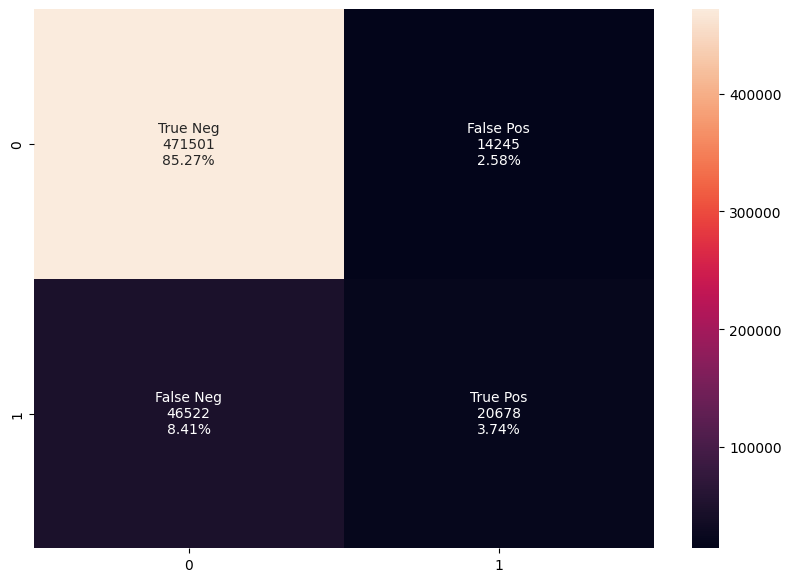

In [110]:
result = confusion_matrix(y_testval23, new_binary_predictions23)
plt.figure(figsize = (10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in result.flatten()/np.sum(result)]
cnf_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
cnf_labels = np.asarray(cnf_labels).reshape(2,2)
sn.heatmap(result, annot=cnf_labels, fmt='')

In [133]:
# Test the model on new data
total_predict_23 = model23.predict(X_reshaped23)

# Convert the continuous predictions to binary class labels
total_predict_23 = (total_predict_23 > 0.5).astype(int)

print(total_predict_23)

86398/86398 ━━━━━━━━━━━━━━━━━━━━ 913s 11ms/step
[[[0]]

 [[0]]

 [[0]]

 ...

 [[1]]

 [[1]]

 [[1]]]


In [134]:
total_predict_23 = np.squeeze(total_predict_23)
total_predict_23=total_predict_23.reshape(-1,1)

In [137]:
data_f23=df_f23.drop(['Bx23', 'By23', 'Bz23', 'label23'], axis=1)
r_data23=np.concatenate((data_f23,total_predict_23), axis=1)
r_data23

array([[Timestamp('2017-03-28 00:00:01.671000+0000', tz='UTC'),
        4.93025354317605, 0],
       [Timestamp('2017-03-28 00:00:01.702000+0000', tz='UTC'),
        4.950666621779334, 0],
       [Timestamp('2017-03-28 00:00:01.733000+0000', tz='UTC'),
        4.990120239032322, 0],
       ...,
       [Timestamp('2017-03-28 23:59:58.928000+0000', tz='UTC'),
        13.520314345458099, 1],
       [Timestamp('2017-03-28 23:59:58.959000+0000', tz='UTC'),
        13.526865860205755, 1],
       [Timestamp('2017-03-28 23:59:58.990000+0000', tz='UTC'),
        13.510666156781465, 1]], dtype=object)

In [138]:
updated_time23=r_data23[:,0]
updated_B23=r_data23[:,1]
updated_label23=r_data23[:,2]

02-Sep-24 23:07:20: C:\Users\posha\AppData\Local\Temp\ipykernel_26348\3973738397.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped = df.resample(freq)



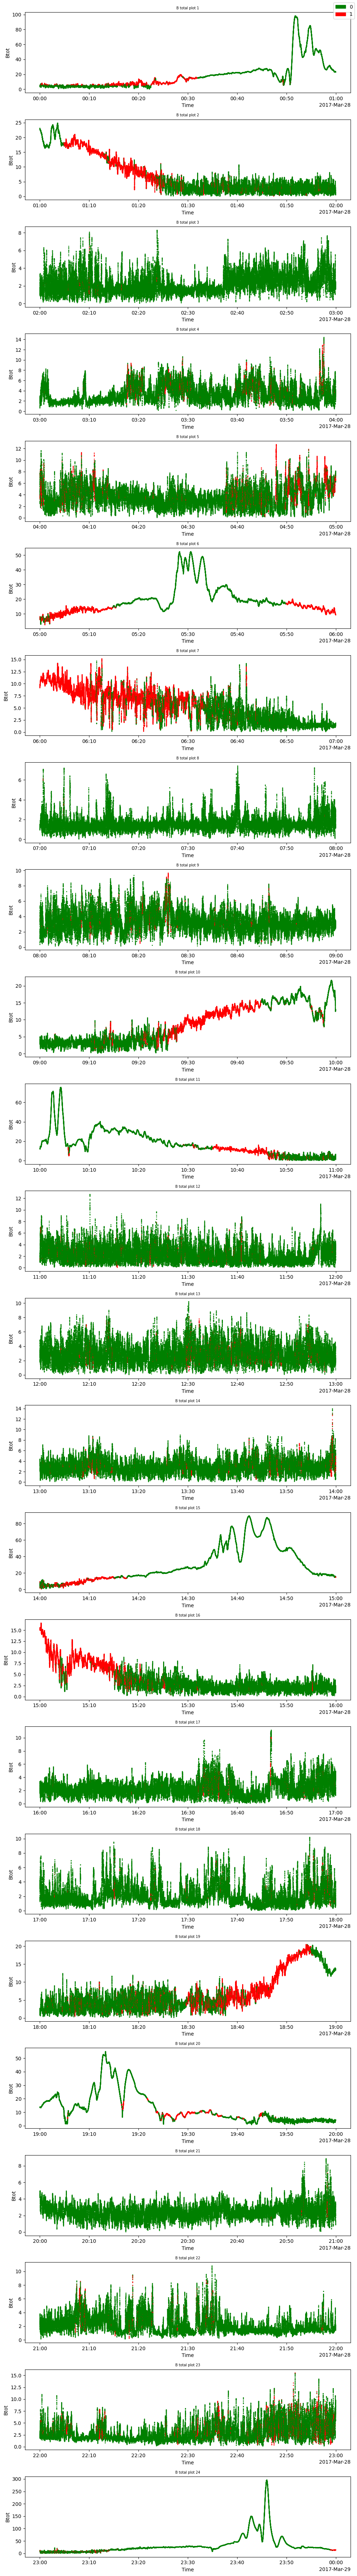

In [139]:
# Function to segment data based on one-hour intervals
def segment_data(times, data, freq='1H'):
    df = pd.DataFrame({'times': times})
    df.set_index('times', inplace=True)
    if data.ndim == 1:
        df['data'] = data
    else:
        # Handle the case where data is a 2D array
        for i in range(data.shape[0]):
            df[f'data_{i}'] = data[i, :]
    grouped = df.resample(freq)
    return [group for _, group in grouped]

# Segment the timeseries data into one-hour intervals
segments_Btot = segment_data(updated_time23, updated_B23, '1H')

# Calculate the total number of segments (maximum of all segment lengths times 3 for each data type)
num_segments = len(segments_Btot)

# Create subplots
fig, axes = plt.subplots(num_segments, 1, figsize=(10, 3 * num_segments))

# Ensure axes is iterable
if num_segments == 1:
    axes = [axes]

# Define colors for the different labels
label_colors = {
    0: 'green',
    1: 'red',
}

legend_patches = [mpatches.Patch(color=color, label=label) for label, color in label_colors.items()]

# Plot each segment
for i in range(num_segments):
    # Plot for Btot
    segment = segments_Btot[i]
    times_segment = segment.index.to_numpy()
    Btot_segment = segment['data'].to_numpy()
    
    # Calculate the labels for this segment
    labels_segment = updated_label23[i * len(times_segment):(i + 1) * len(times_segment)]  # Adjust based on the segment

    # If Btot_segment is empty, skip the plotting
    if Btot_segment.size == 0:
        continue

    # Assign colors based on labels
    colors = ['red' if label == 1 else 'green' for label in labels_segment]

    # Plot the data points with corresponding colors
    axes[i].scatter(times_segment, Btot_segment, color=colors, s=1)
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Btot')
    axes[i].set_title(f'B total plot {i + 1}', fontsize=7)

# Add a legend to the plot
fig.legend(handles=legend_patches, loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()
# plt.savefig('0322_2g_output')

# Display the plot
plt.show()